In [2]:
from config_ignore import api_key
from alpha_vantage.timeseries import TimeSeries
import os
import pandas as pd
import numpy as np
%matplotlib inline

import requests

In [70]:
def get_daily_symbol(symbol):
    params = dict(function='TIME_SERIES_DAILY',symbol='T',apikey=api_key,outputsize='full')
    resp = requests.get('https://www.alphavantage.co/query', params=params)
    resp_json = resp.json()
    df = pd.DataFrame.from_dict(resp_json['Time Series (Daily)'], orient='index', dtype='float')
    df.columns = [c[c.find(' ')+1:] for c in df]
    df.index = pd.to_datetime(df.index)
    meta = resp_json['Meta Data']
    return df, meta

In [71]:
df, meta = get_daily_symbol('F')

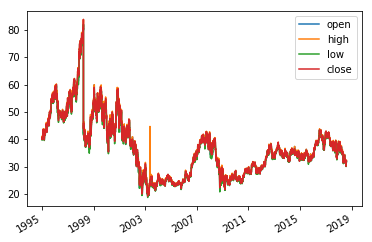

In [73]:
df.drop('volume',1).plot()